In [1]:
import mmcv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
cf_sum = mmcv.load('/home/trungct/pyskl/work_dirs/cf/cf_spatial2_conv.pkl').astype(float)
cf_conv = mmcv.load('/home/trungct/pyskl/work_dirs/cf/cf_spatial2_conv_gcl.pkl').astype(float)
with open('/home/trungct/pyskl/tools/data/label_map/nturgbd_120.txt', 'r') as file:
    labels = [line.strip() for line in file.readlines()[0:60]]

cf = (cf_conv - cf_sum).astype(np.int32)
cf[np.abs(cf) <= 1] = 0

In [11]:
cf

array([[ 0,  2, 10, ...,  0,  0,  0],
       [ 0,  0,  3, ...,  0,  0,  0],
       [-3,  0,  6, ...,  0,  0,  0],
       ...,
       [ 0,  0, -2, ..., -3,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int32)

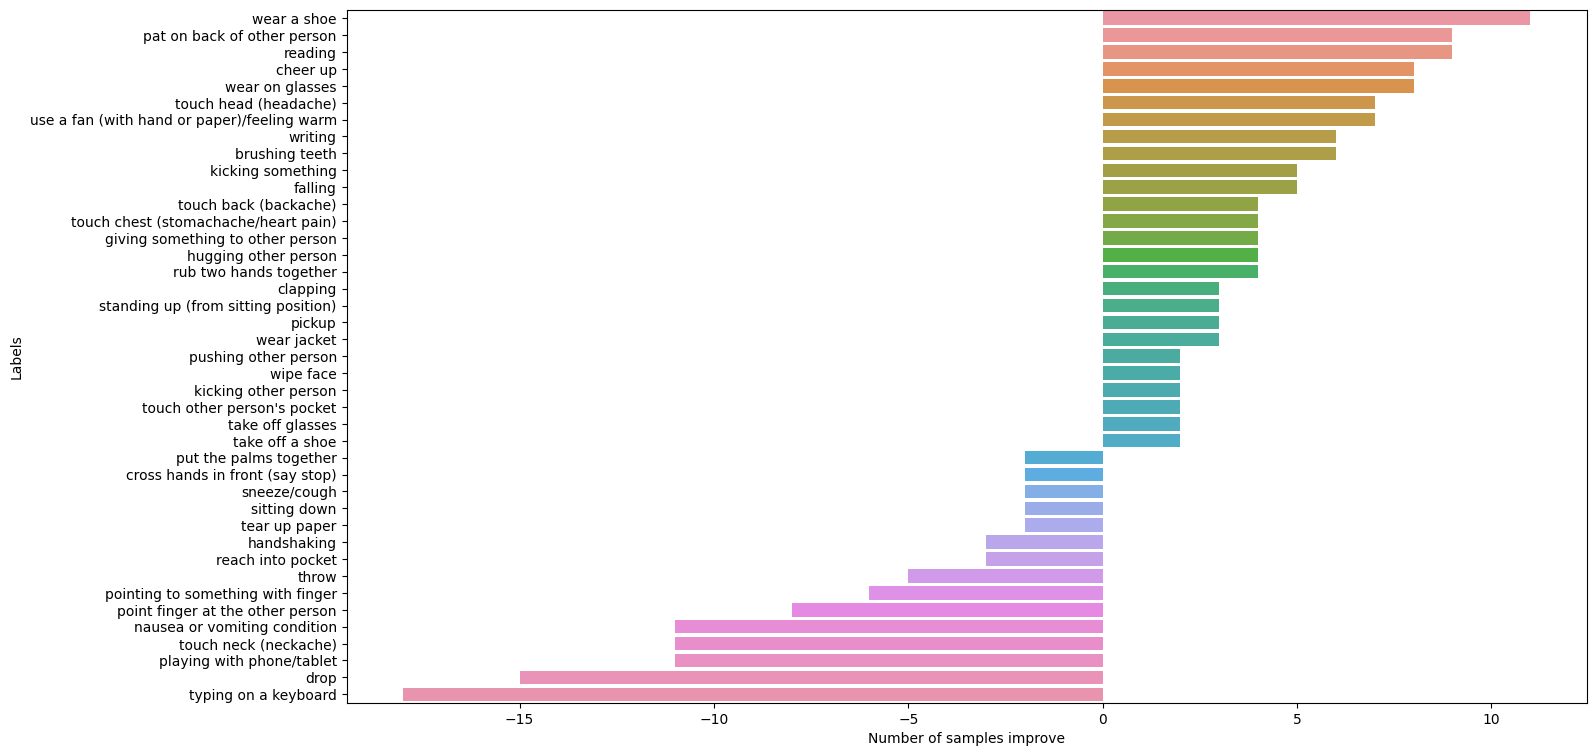

In [12]:
plt.figure(figsize=(16, 9))
indexes = np.where(cf.diagonal() != 0)[0]
data = cf.diagonal()[indexes]
names = np.array(labels)[indexes]
df = pd.DataFrame.from_dict({
    'labels':  names,
    'improve': data
}).sort_values(by = 'improve', ascending=False)
sns.barplot(df, x = 'improve', y = 'labels', orient='h')
plt.ylabel("Labels")
plt.xlabel("Number of samples improve")
plt.show()

In [9]:
# plt.figure(figsize=(16, 9))
# sns.heatmap(cf, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
# plt.title("Confusion Matrix")
# plt.ylabel("Predicted Label")
# plt.xlabel("True Label")
# plt.show()

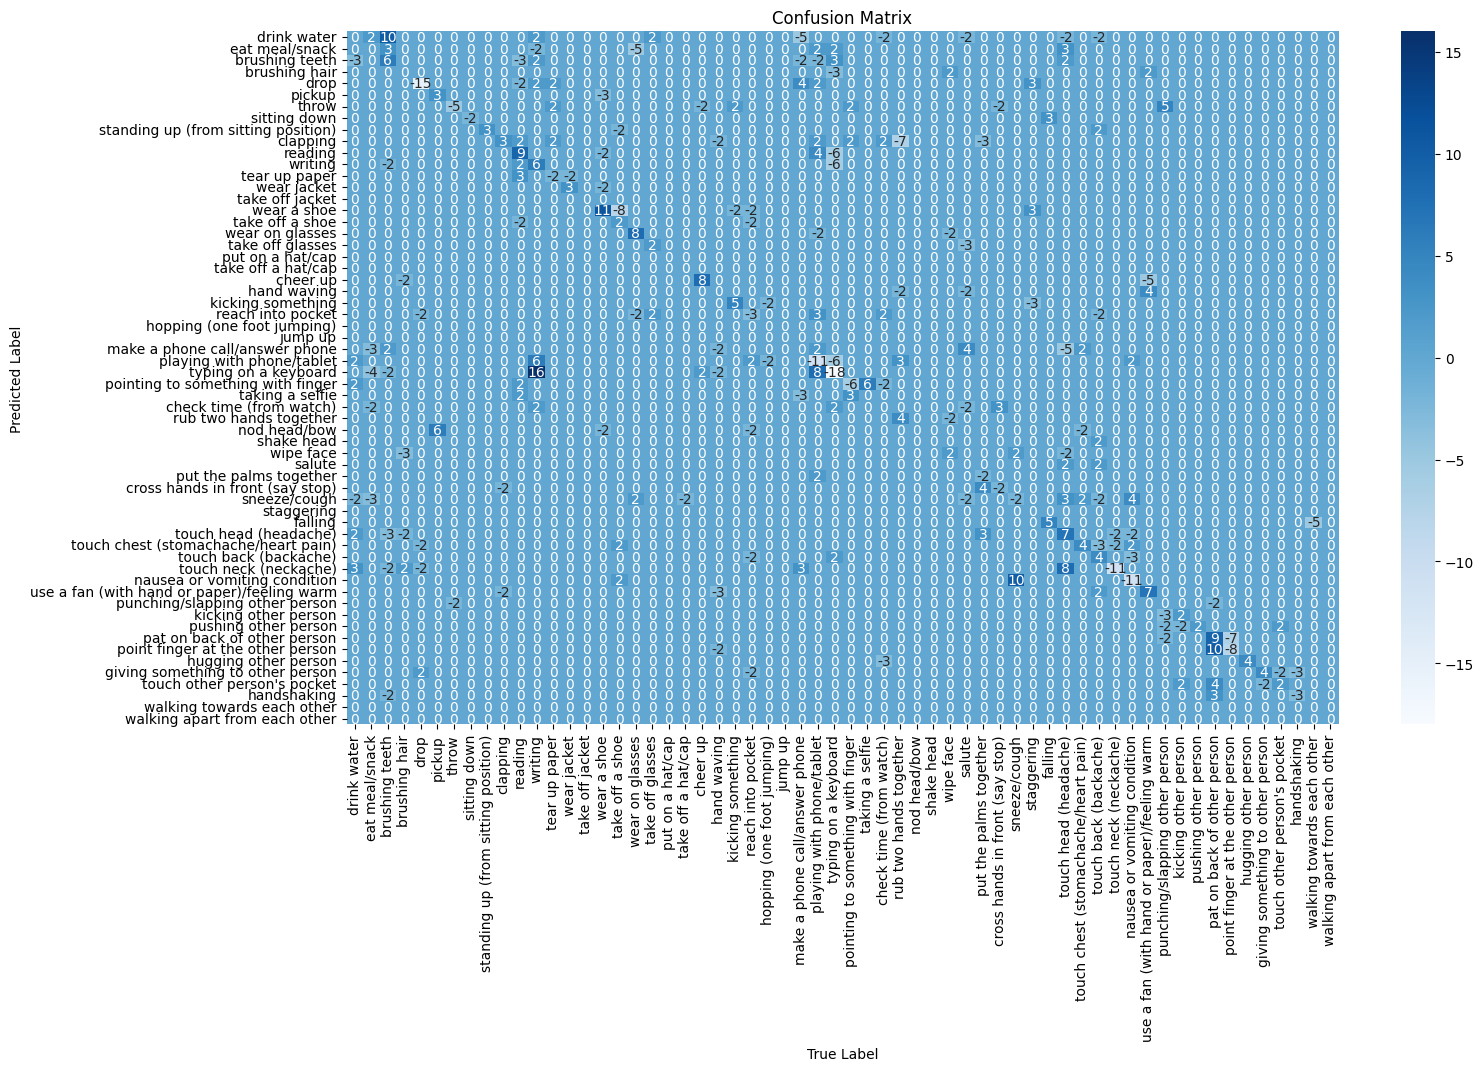

In [13]:
plt.figure(figsize=(16, 9))
sns.heatmap(cf.astype(np.int32), annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.ylabel("Predicted Label")
plt.xlabel("True Label")
plt.show()